$\newcommand{\d}{\mathrm{d}}$

# Ordinary differential equations

Finding the solutions to ordinary differential equations (ODEs) are one of the most common use cases for numerical techniques in physics.

## First-order differential equations

Let's begin with a discussion of first-order differential equations with a single independent variable.  The general form of such an equation (with independent variable time $t$ and dependent variable position $x$) is
\begin{equation}\tag{1}
    \frac{\d x}{\d t}=f(x,t),
\end{equation} where $f(x,t)$ is some specified function of $x$ and $t$.  To solve such an equation, we seek a function $x(t)$ (the solution) for which this equation holds.  The function $f(x,t)$ only specifies the slope of the solution.  We need an initial or boundary condition to fully determine the solution.

### Euler's method

Let's assume we are given a differential equation in the form of Equation 1 and suitable initial conditions; in this case, the position of the object at some inital time $t_0$, $x(t_0)$.  Then we can calculate the position of this object a short time interval $h$ later by considering the Taylor expansion of $x(t_0+h)$ about $x(t_0)$:
\begin{align}
    x(t_0+h) &= x(t_0) + h\left[\frac{\d x}{\d t}\right]_{t_0} + \frac{1}{2}h^2\left[\frac{\d^2x}{\d t^2}\right]_{t_0} + \cdots\\
             &= x(t_0) + hf(x(t_0),t_0) + \mathcal{O}(h^2)
\end{align}
Neglecting terms proportional to the second and higher powers of the small parameter $h$ yields the basic equation of Euler's method: \begin{equation}\tag{2}
    x(t_0+h) = x(t_0) + hf(x(t_0),t_0).
\end{equation}

Through repeated application of this equation, we can iteratively calculate the position of the object indefinitely into the future; we use the initial conditions at time $t_0$ to determine the slope of the solution at $t_0$ and extrapolate the solution to time $t_0+h$, from which we can calculate the slope of the solution at time $t_0+h$ and extrapolate the solution to time $t_0+2h$, ...

--------------------

Let's use Euler's method to solve the differential equation $\frac{\d x}{\d t}=-3t^2e^x$, subject to the inital condition $x(t_0)=10$ m.

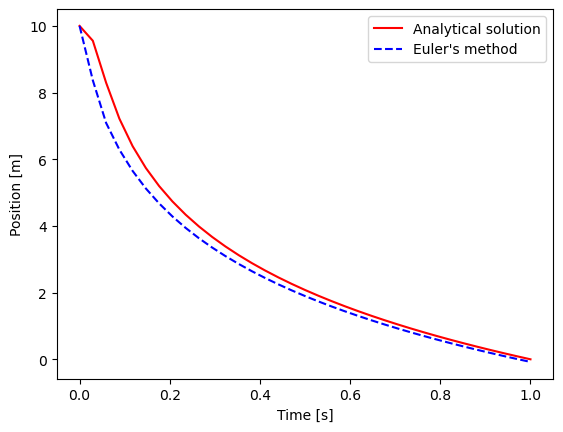

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

x0 = 10 #m
tf = 1 #s
N = 35 #number of steps to perform

def f(x,t):   
    return -3 * t**2 * math.exp(x)

####################################################################
def eulerMethod(f, x0, tf, N):
    
    tValues = np.linspace(0, tf, N)
    h = (tValues[-1] - tValues[0])/N

    xValues = [x0]  
    
    x = x0
    for t in tValues[1:]:   #we already know x(t[0]) = x0
        x = x + h*f(x,t)
        xValues.append(x)

    return tValues, xValues
####################################################################

tValues, euler = eulerMethod(f, x0, tf, N)

plt.figure()

plt.plot(tValues, -np.log(tValues**3 + math.exp(-x0)), "r" , label="Analytical solution")
plt.plot(tValues, euler, "b--" , label="Euler's method")

plt.xlabel("Time [s]")
plt.ylabel("Position [m]")

plt.legend(loc='best')

For such a simple method, the results are surprisingly accurate.

-------------

Since Euler's method is based on a Taylor expansion that neglects terms of order $h^2$ (and higher orders), each step of the process introduces an error proportional to $h^2$.  Thus, in order to minimize the error, we should make $h$ as small as possible.  However, this leads to increased CPU consumption.  

Regardless of the size of $h$, since the method involves repeated application of Equation 2, the cumulative error grows with each iteration.  It turns out that the cumulative error is generally about an order of magnitude larger than the per-step error, so Euler's method is typically really only accurate to first order in $h$.  Fortunately, there are more accurate methods which are only slightly more complicated to program.

### Runge-Kutta method

There are a variety of Runge-Kutta (RK) methods which gives results of varying degrees of accuracy.  Euler's method is technically a first-order RK method (meaning it is accurate only to first order in $h$).  Let's investigate the second-order RK method.

Equation 1 tells us the slope of the solution for any values of $x$ and $t$.  Initial conditions are typically given, which specify the position $x(t_0)$.  Thus, we can calculate the slope of the solution $x(t)$ at $t=t_0$ as $f(x(t_0),t_0)$.

<center>
<div>
    <img src="../Images/fig8-2.png" width="500"/>
</div>
</center>

In the context of Euler's method, we use this value (along with Equation 2) to extrapolate the solution from time $t_0$ to $t_0+h$; in other words, to obtain $x(t_0+h)$.  With this estimate, we can then calculate the slope of the solution at time $t_0+h$, extrapolate the solution from time $t_0+h$ to $t_0+2h$, and repeat ad infinitum.

The second-order RK method is similar, except that we don't use the slope at time $t_0$ to extrapolate to $t_0+h$.  Instead, we use the slope at the midpoint of the interval, which occurs at time $t_0+h/2$, to perform the extrapolation.

To understand why this represents an improvement over Euler's method, let's perform a Taylor expansion of $x(t_0)$ and $x(t_0+h)$ around $t_0+h/2$:
\begin{align}
    x(t_0) &= x(t_0+h/2) - \frac{h}{2}\left[\frac{\d x}{\d t}\right]_{t_0+h/2} + \frac{h^2}{8}\left[\frac{\d^2 x}{\d t^2}\right]_{t_0+h/2} + \mathcal{O}(h^3) \\
    x(t_0+h) &= x(t_0+h/2) + \frac{h}{2}\left[\frac{\d x}{\d t}\right]_{t_0+h/2} + \frac{h^2}{8}\left[\frac{\d^2 x}{\d t^2}\right]_{t_0+h/2} + \mathcal{O}(h^3)
\end{align}
Subtracting the former equation from the latter yields
\begin{align}
    &x(t_0+h) - x(t_0) = h\left[\frac{\d x}{\d t}\right]_{t_0+h/2} + \mathcal{O}(h^3)\\
    &x(t_0+h) = x(t_0) + hf(x(t_0+h/2), t_0+h/2) + \mathcal{O}(h^3)\tag{4}.
\end{align}
Conventiently, terms in the expansion which are even in $h$ cancel.  Now, if we retain only the leading term in $h$, the error is $\mathcal{O}(h^3)$.  In other words, Equation 4, which is the basic equation representing the second-order RK method, is accurate to second-order in $h$ (whereas Equation 2 is only accurate to first-order).

The catch to this method is that we need to know $x(t_0+h/2)$.  We can estimate this value using Euler's method and the known value of $x(t_0)$ according to Equation 2 (with the replacement $h\rightarrow h/2$): $x(t_0+h/2) = x(t_0) + \frac{h}{2}f(x(t_0),t_0)$.  With this value, we can estimate the slope at $t_0+h/2$, and use this to extrapolate the solution from time $t_0$ to $t_0+h$.

To summarize, the steps to extrapolate from time $t_0$ to $t_0+h$ using the second-order RK method consist of:
 1. Estimate the solution at time $t_0+h/2$ using Euler's method: $x(t_0+h/2) = x(t_0) + \frac{h}{2}f(x(t_0),t_0)$
 1. Calculate the slope of the solution at time $t_0+h/2$: $m = f(x(t_0+h/2), t_0+h/2)$
 1. Use this slope to estimate the position from time $t_0$ to $t_0+h$: $x(t_0+h) = x(t_0) + mh$
 
We then repeat this process to extrapolate from $t_0+h$ to $t_0+2h$, $t_0+2h$ to $t_0+3h$, ...

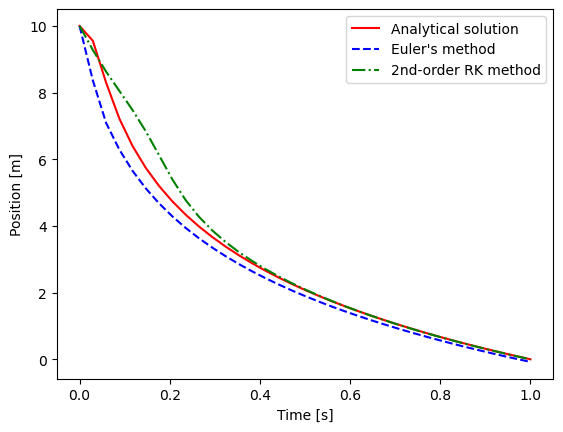

In [2]:
def rk2Method(f, x0, tf, N):

    tValues = np.linspace(0, tf, N)
    h = (tValues[-1] - tValues[0])/N

    xValues = [x0]  

    x = x0
    for t in tValues[1:]:   #we already know x(t[0]) = x0
        ##########################################################
        #This is where the method differes from Euler's method
        xm = x + (h/2)*f(x,t)
        slope = f(xm,t)
        x = x + h*slope
        ##########################################################
        
        xValues.append(x)
        
    return tValues, xValues
####################################################################

tValues, euler = eulerMethod(f, x0, tf, N)
tValues, rk2 = rk2Method(f, x0, tf, N)

plt.figure()

plt.plot(tValues, -np.log(tValues**3 + math.exp(-x0)), "r" , label="Analytical solution")
plt.plot(tValues, euler, "b--" , label="Euler's method")
plt.plot(tValues, rk2,   "g-." , label="2nd-order RK method")

plt.xlabel("Time [s]")
plt.ylabel("Position [m]")

plt.legend(loc='best')

-----------------

The fourth-order RK method is only slightly more complicated than the second-order RK method, but can be considerably more accurate.  Like the second-order RK method, it involves the calculation of Taylor expansions around various points, then taking an appropriate linear combination (causing certain terms to cancel, as above).  The basic equation that results is
\begin{equation}\tag{5}
    x(t_0+h) = x(t_0) + \frac{1}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right),
\end{equation}
where 
\begin{align}
    k_1&=hf(x(t_0), t_0)\\
    k_2&=hf(x(t_0)+\frac{1}{2}k_1, t_0+\frac{1}{2}h)\\
    k_3&=hf(x(t_0)+\frac{1}{2}k_2, t_0+\frac{1}{2}h)\\
    k_4&=hf(x(t_0)+k_3, t_0+h).
\end{align}
Equation 5 is accurate to fourth-order in $h$.  

Let's compare the results of this method with the previous methods.

Text(0, 0.5, 'Position [m]')

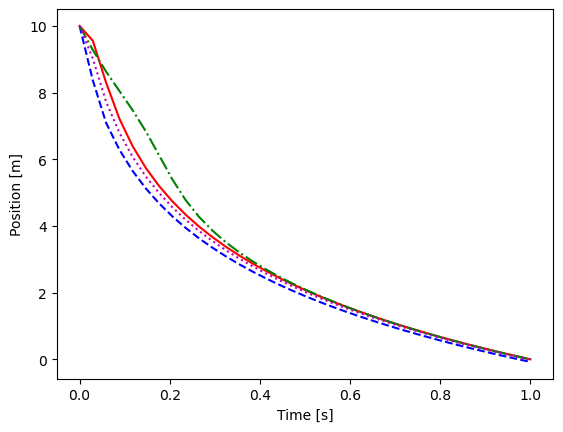

In [3]:
def rk4Method(f, x0, tf, N):

    tValues = np.linspace(0, tf, N)
    h = (tValues[-1] - tValues[0])/N

    xValues = [x0]  

    x = x0
    for t in tValues[1:]:   #we already know x(t[0]) = x0
        ##########################################################
        #This is where the method differes from Euler's method
        k1 = h*f(x,t)
        k2 = h*f(x+k1/2,t)
        k3 = h*f(x+k2/2,t)
        k4 = h*f(x+k3,t)
    
        x = x + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        ##########################################################
        
        xValues.append(x)
        
    return tValues, xValues
####################################################################

tValues, euler = eulerMethod(f, x0, tf, N)
tValues, rk2 = rk2Method(f, x0, tf, N)
tValues, rk4 = rk4Method(f, x0, tf, N)

plt.figure()

plt.plot(tValues, -np.log(tValues**3 + math.exp(-x0)), "r" , label="Analytical solution")
plt.plot(tValues, euler, "b--" , label="Euler's method")
plt.plot(tValues, rk2,   "g-.", label="2nd-order RK method")
plt.plot(tValues, rk4,   "m:" , label="4th-order RK method")

plt.xlabel("Time [s]")
plt.ylabel("Position [m]")

### Exercise

Use Euler's method to solve the differential equation describing the motion of an object subject to a linear drag force $F=-bv(t)$, where $b$ is a positive constant.  In this case, Newton's second law gives
\begin{align}
    F &= ma\\
    -bv(t) &= m\frac{\d v}{\d t},
\end{align}
or
\begin{equation}\tag{3}
    \frac{\d v}{\d t} = -\frac{b}{m}v(t).
\end{equation}
This represents a differential equation where the dependent variable is not position, but instead velocity, in which case Equations 1 and 2 become $\frac{\d v}{\d t}=f(v,t)$ and $v(t_0+h) = v(t_0) + hf(v(t_0),t_0)$, respectively.  Therefore, we can identify $f(v,t) = -\frac{b}{m}v(t)$.

Your goal is to calculate the velocity of the object at all future times.  Assume that $b=0.1$ kg/s, $m=1$ kg, and the initial velocity of the object was $v(t_0=0) = 10$ m/s.  Compare your solution with the analytical solution $v(t) = v(t_0)e^{-b(t-t_0)/m}$.

<details>
    <summary style="display:list-item">Click for solution</summary>

```python
v0 = 10 #m/s
b  = .1  #kg/s
m  = 1  #kg

tf = 100 #s 
N = 40 #number of steps to perform

#in this case, f does not explicitly depend on time
def fDrag(v,t):   
    return -b*v/m 

tValues, euler = eulerMethod(fDrag, v0, tf, N)

plt.figure()

plt.plot(tValues, v0*np.exp(-b*tValues/m), "r" , label="Analytical solution")
plt.plot(tValues, euler, "b--" , label="Euler's method")

plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")

plt.legend(loc='best')
```
    
</details>

NB: in some situations, Euler's method can become unstable. Let's try again, but with $b=1$ kg/s.

In [4]:
b  = 1  #kg/s

tValues, euler = eulerMethod(f, v0, tf, N)

plt.figure()

plt.plot(tValues, v0*np.exp(-b*tValues/m), "ro" , label="Analytical solution")
plt.plot(tValues, euler, "b" , label="Euler's method")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")

plt.legend(loc='best')

NameError: name 'v0' is not defined

This time, the absolute value of the velocity increases as a function of time, which clearly can't be the correct behavior in the presence of an opposing drag force.

### Solutions over an infinite range

Sometimes we wish to extrapolate our solution all the way to $t=\infty$.  This can be accomplished (without performing an infinite number of iterations) by performing a change of variables.

Just as we did when performing integration over an infinite range, let's define $u=\frac{t}{1+t}$.  After inversion, this becomes $t=\frac{u}{1-u}$, which approaches 1 as $u\rightarrow\infty$.  

We can use the chain rule to rewrite our differential equation as
\begin{equation}
    \frac{\d x}{\d u}\frac{\d u}{\d t} = f\left(x,t\right),
\end{equation}
or 
\begin{equation}\tag{6}
    \frac{\d x}{\d u} = \frac{\d t}{\d u}f\left(x,\frac{u}{1-u}\right).
\end{equation}

The derivative $\frac{\d t}{\d u}$ is easily calculable as $\frac{1}{\left(1-u\right)^2}$.  Plugging this into Equation 6, we obtain 
\begin{equation}
    \frac{\d x}{\d u} = \frac{1}{\left(1-u\right)^2}f\left(x,\frac{u}{1-u}\right).
\end{equation}
In terms of a new function $g(x,u)=\frac{1}{\left(1-u\right)^2}f\left(x,\frac{u}{1-u}\right)$, this becomes
\begin{equation}\tag{7}
    \frac{\d x}{\d u} = g(x,u).
\end{equation}
This is a standard first-order differential equation, which we can solve using the Euler or RK methods.  The key is that we only need to solve this equation up to $u=1$, which corresponds to $t=\infty$.  The resulting solution is the function $x(u)$, which we can remap to $x(t)$ using $t=\frac{u}{1-u}$.

--------

Let's use this method to solve the differential equation $\frac{\d x}{\d t} = \frac{1}{x^2+t^2}$, assuming $x(t_0)=1$ m.  In this case, we have
\begin{align}
    g(x,u) &= \frac{1}{\left(1-u\right)^2} f(x,\frac{u}{1-u})\\
           &= \frac{1}{\left(1-u\right)^2} \frac{1}{x^2+\left(\frac{u}{1-u}\right)^2}\\
    g(x,u) &= \frac{1}{\left(1-u\right)^2x^2+u^2},
\end{align}
and we must solve the differential equation $\frac{\d x}{\d u} = g(x,u)$ for $u$ from zero to one, with $x(u_0)=1$ m.

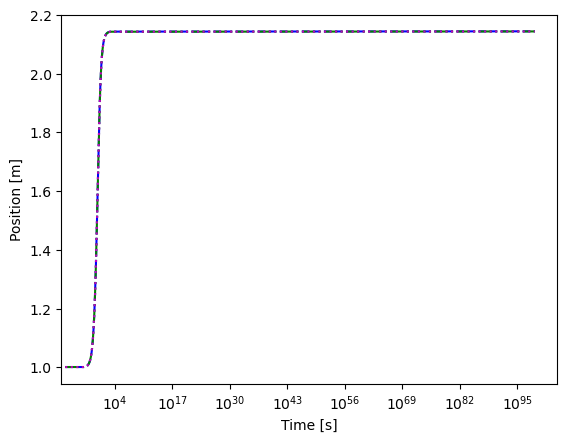

In [5]:
uf = 1
N = 1000
x0 = 1

def g(x,u):
    return 1/(((1-u)**2)*(x**2) + u**2)
    
uValues, euler = eulerMethod(g, x0, uf, N)
uValues, rk2 = rk2Method(g, x0, uf, N)
uValues, rk4 = rk4Method(g, x0, uf, N)

#function to map values of u to values of t
def u2t(u):
    result=[]
    
    for v in u:
        #make sure not to divide by zero (when u=1)
        if math.isclose(v,1): result.append(1e99)
        else:                 result.append(v/(1-v))
    
    return result

tValues = u2t(uValues)

#########################################################################################
plt.figure()

plt.plot(tValues, euler, "b--" , label="Euler's method")
plt.plot(tValues, rk2,   "g-.",  label="2nd-order RK method")
plt.plot(tValues, rk4,   "m:" ,  label="4th-order RK method")

plt.xlabel("Time [s]")
plt.ylabel("Position [m]")

plt.xscale('log')

### Simultaneous differential equations

FIX ME - USE THE VECTOR NOTATION - IT IS NOT EQUIVALENT TO WHAT I DID

We often encounter systems of differential equations in physics, in which the derivative of the dependent variables depend on one another and the independent variable, such as
\begin{equation}
    \frac{\d x}{\d t} = f_x(x, y, t)
\end{equation}
and
\begin{equation}
    \frac{\d y}{\d t} = f_y(x, y, t).
\end{equation}

The generalization of the above methods to the multivaruiable case is completely straightforward.  As an example, let's consider the Euler method with two variables.

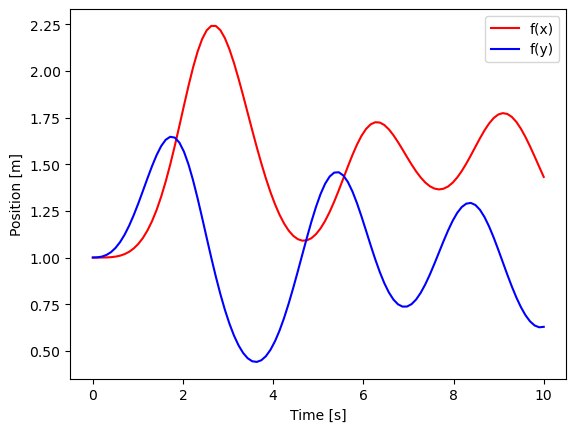

In [157]:
x0 = y0 = 1 #m
tf = 10 #s
N = 100 #number of steps to perform

def fx(x,y,t):   
    return x*y - x

def fy(x,y,t):
    return y - x*y + math.sin(t)**2
'''
####################################################################
def eulerMethod2(fx, fy, x0, y0, tf, N):
    
    tValues = np.linspace(0, tf, N)
    h = (tValues[-1] - tValues[0])/N

    xValues = [x0]  
    yValues = [y0]
    
    x = x0
    y = y0
    for t in tValues[1:]:   #we already know x(t[0]) = x0, and y(t[0]) = y0
        x = x + h*fx(x,y,t)
        xValues.append(x)
        
        y = y + h*fy(x,y,t)
        yValues.append(y)
        
    return tValues, xValues, yValues

####################################################################
def rk2Method2(fx, fy, x0, y0, tf, N):

    tValues = np.linspace(0, tf, N)
    h = (tValues[-1] - tValues[0])/N

    xValues = [x0]  
    yValues = [y0]
    
    x = x0
    y = y0
    for t in tValues[1:]:   #we already know x(t[0]) = x0, and y(t[0]) = y0
        ##########################################################
        #This is where the method differes from Euler's method
        k1 = h*fx(x,y,t)
        k2 = h*fx(x+.5*k1,y,t)
        x = x + k2
        
        k1 = h*fy(x,y,t)
        k2 = h*fy(x,y+.5*k1,t)
        y = y + k2
        """
        xm = x + (h/2)*fx(x,y,t)
        slope = fx(xm,y,t)
        x = x + h*slope
        
        ym = y + (h/2)*fy(x,y,t)
        slope = fy(x,ym,t)
        y = y + h*slope
        """
        ##########################################################
        
        xValues.append(x)
        yValues.append(y)
        
    return tValues, xValues, yValues
'''
####################################################################
def rk4Method2(fx, fy, x0, y0, tf, N):

    tValues = np.linspace(0, tf, N)
    h = (tValues[-1] - tValues[0])/N

    xValues = [x0]  
    yValues = [y0]
    
    x = x0
    y = y0
    for t in tValues[1:]:   #we already know x(t[0]) = x0, and y(t[0]) = y0
        ##########################################################
        #This is where the method differes from Euler's method
        k1 = h*fx(x,y,t)
        k2 = h*fx(x+k1/2,y,t)
        k3 = h*fx(x+k2/2,y,t)
        k4 = h*fx(x+k3,y,t)
    
        x = x + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        
        #- - - - - - - - - - - - - - - - - - - - - - - - - - - - -
        k1 = h*fy(x,y,t)
        k2 = h*fy(x,y+k1/2,t)
        k3 = h*fy(x,y+k2/2,t)
        k4 = h*fy(x,y+k3,t)
    
        y = y + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        ##########################################################
        
        xValues.append(x)
        yValues.append(y)
        
    return tValues, xValues, yValues

####################################################################

tValues, xValues, yValues = rk2Method2(fx, fy, x0, y0, tf, N)

plt.figure()

plt.plot(tValues, xValues, "r" , label="f(x)")
plt.plot(tValues, yValues, "b" , label="f(y)")

plt.xlabel("Time [s]")
plt.ylabel("Position [m]")

plt.legend(loc='best')

## Second-order differential equations

Solving second- or higher-order differential equations is also quite simple, using the same techniques we have already reviewed.  

Consider a second-order differential equation such as
\begin{equation}
    \frac{\d^2x}{\d t^2} = f\left(x, \frac{\d x}{\d t}, t\right).
\end{equation}
Let's define a new quantity $y$, given by
\begin{equation}\tag{8}
    \frac{\d x}{\d t}=y.
\end{equation}
In terms of $y$, our differential equation becomes
\begin{equation}\tag{9}
    \frac{\d y}{\d t} = f\left(x, y, t\right).
\end{equation}
Equations 8 and 9 are standard first-order differential equations.  Thus, solving a second-order differential equation can be recast into the problem of solving two simultaneous first-order differential equations, which we know how to solve.

### Nonlinear pendulum

Text(0, 0.5, 'Theta [rad]')

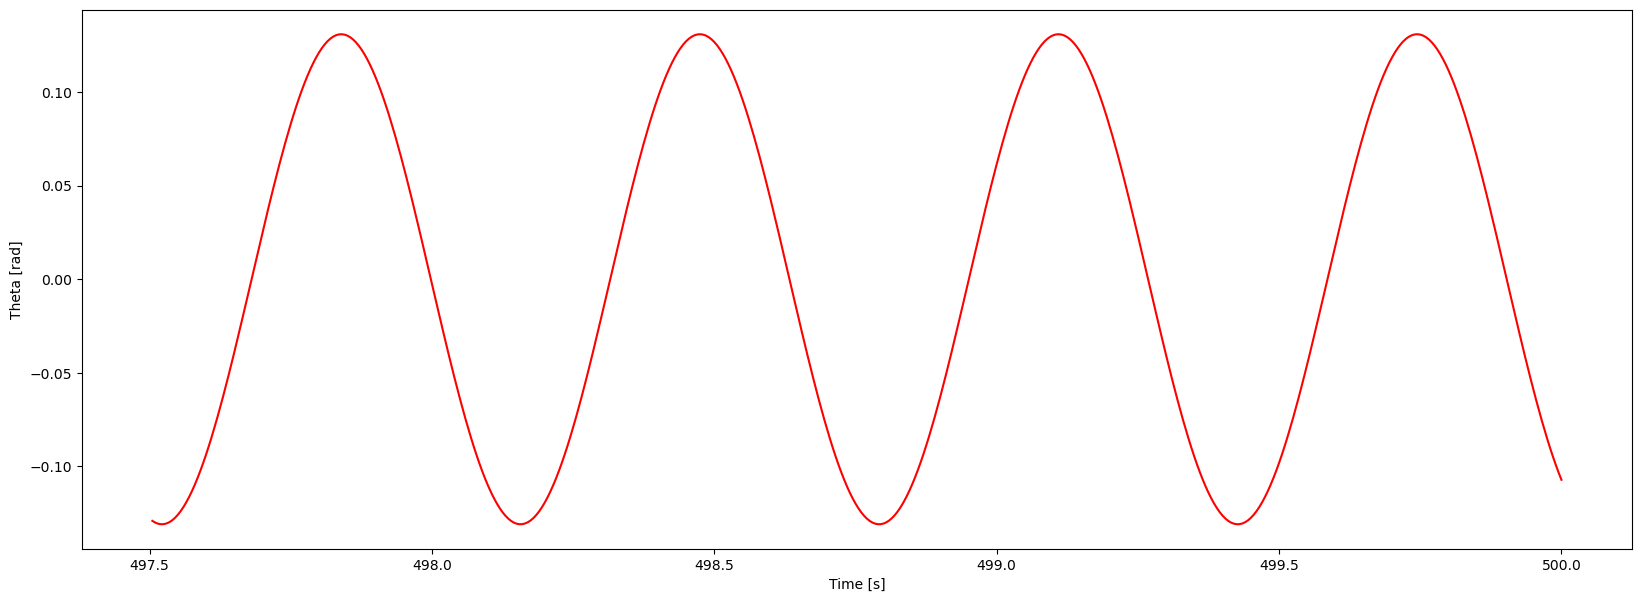

In [164]:
g = 9.81 #m/s^2
l = 0.1  #m
theta0 = math.pi/24
omega0 = 0

tf = 500
N = 100000 #number of steps to perform

def fTheta(theta,omega,t):   
    return omega

def fOmega(theta,omega,t):
    return -g*math.sin(theta)/l

tValues, thetaValues, omegaValues = rk2Method2(fTheta, fOmega, theta0, omega0, tf, N)

plt.figure(figsize=(20,7))

plt.plot(tValues[-500:], thetaValues[-500:], "r")

plt.xlabel("Time [s]")
plt.ylabel("Theta [rad]")

Text(0, 0.5, 'K+U')

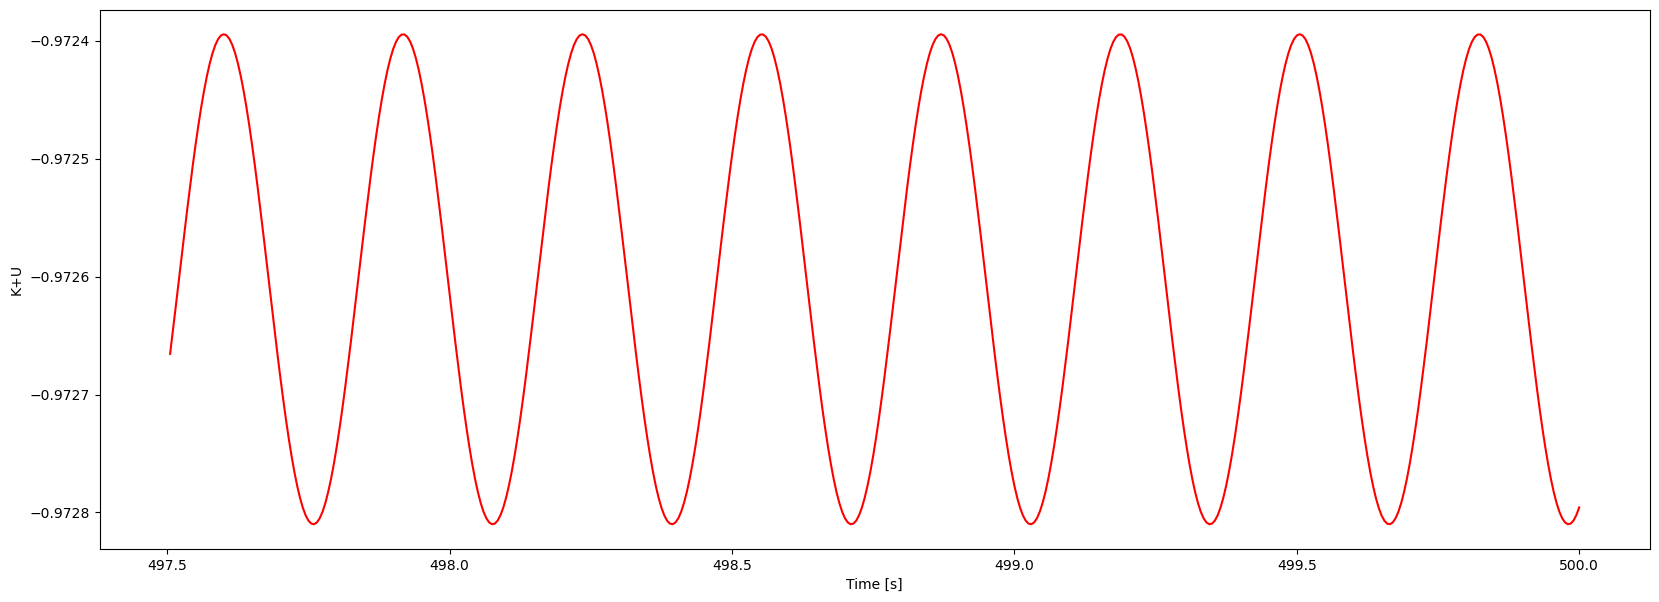

In [160]:
m = 1 #kg

thetaValues = np.array(thetaValues, float)
omegaValues = np.array(omegaValues, float)

K = .5*m*(l**2)*(omegaValues**2)
U = -m*g*l*np.cos(thetaValues)

plt.figure(figsize=(20,7))

#plt.plot((tValues[:500])+(tValues[-500:]), ((K+U)[:500])+((K+U)[-500:]), "r")
#plt.plot(tValues[:500], (K+U)[:500], "r")
plt.plot(tValues[-500:], (K+U)[-500:], "r")

plt.xlabel("Time [s]")
plt.ylabel("K+U")

In [89]:
# ------------------------------------------------------------------------
# Estimate the solution to a differential equation using the leapfrog method
def run_frg_vec(a,b,N,r_initial):

    delta_t = (b-a)/N  # find the step size delta_t
    t = 0
    r1 = r_initial      # Set the initial point
    r2 = r1 + 0.5*delta_t*f(r1,t) # Set the second point
    time_array  = np.arange(a,b,delta_t)  # array for iteration
    print("Run LeapFrog: delta_t = ",delta_t, " r_initial = ",r_initial)

    # lists to track x and t for each step
    tpoints  = []
    xpoints  = []
    ypoints  = []

    # loop over the time range with step size delta_t
    for t in time_array:
        xpoints.append(r1[0]) # put the values for this time into the array
        ypoints.append(r1[1]) # put the values for this time into the array
        tpoints.append(t) # keep track of the time for plotting

        # perform leapfrog method (setup the values for the next time iteration)
        r1 += delta_t * f(r2, t)
        r2 += delta_t * f(r1, t)

    return xpoints, ypoints, tpoints

In [105]:
# Non-linear pendulum


# constants
g = 9.81
l = 0.1
m = 1

# time range
a = 0
b = 5# 5, 500
N = 5000 # 5000

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*np.sin(theta)
    return np.array([ftheta,fomega],float)


# initial positions
t = 0

start_angle_deg = 190 # Angle in degrees
r = np.array([np.pi*start_angle_deg/180,0.0],float)

x =  l*np.sin(r[0])
y = -l*np.cos(r[0])

print("initial theta, omega = ", r )
print("initial f(theta), f(omega) = ", f(r,t)  )

# Run Euler method
r_init = np.array([np.pi*start_angle_deg/180,0.0],float)
eul_pend_theta, eul_pend_omega, eul_pend_t = run_euler_vec(a, b, N,r_init)

# Run RK2 method
r_init = np.array([np.pi*start_angle_deg/180,0.0],float)
rk2_pend_theta, rk2_pend_omega, rk2_pend_t = run_rk2_vec(a, b, N,r_init)

# Run RK4 method
r_init = np.array([np.pi*start_angle_deg/180,0.0],float)
rk4_pend_theta, rk4_pend_omega, rk4_pend_t = run_rk4_vec(a, b, N,r_init)

# Run LeapFrog method
r_init = np.array([np.pi*start_angle_deg/180,0.0],float)
frg_pend_theta, frg_pend_omega, frg_pend_t = run_frg_vec(a, b, N,r_init)



initial theta, omega =  [3.31612558 0.        ]
initial f(theta), f(omega) =  [ 0.         17.03488623]
Run Euler: delta_t =  0.001  r_initial =  [3.31612558 0.        ]
Run RK2: delta_t =  0.001  r_initial =  [3.31612558 0.        ]
Run RK4: delta_t =  0.001  r_initial =  [3.31612558 0.        ]
Run LeapFrog: delta_t =  0.001  r_initial =  [3.31612558 0.        ]


In [106]:

# Define general functions to solve simultaneous differential equations

# ------------------------------------------------------------------------
# Estimate the solution to a differential equation using Euler's method
def run_euler_vec(a,b,N,r_initial):

    delta_t = (b-a)/N  # find the step size delta_t
    r = r_initial      # Set the initial condition (r is a 1D numpy array (a vector))
    time_array  = np.arange(a,b,delta_t)  # array for iteration
    print("Run Euler: delta_t = ",delta_t, " r_initial = ",r_initial)

    # lists to track x and t for each step
    tpoints  = []
    xpoints  = []
    ypoints  = []

    # loop over the time range with step size delta_t
    for t in time_array:
        #print(r[0],r[1])
        xpoints.append(r[0]) # put the values for this time into the array
        ypoints.append(r[1]) # put the values for this time into the array
        tpoints.append(t) # keep track of the time for plotting
        #  perform euler's method (setup the values for the next time iteration)
        r += delta_t * f(r,t)

    return xpoints, ypoints, tpoints

# ------------------------------------------------------------------------
# Estimate the solution to a differential equation using the midpoint method (2nd order RK)
def run_rk2_vec(a,b,N,r_initial):

    delta_t = (b-a)/N  # find the step size delta_t
    r = r_initial      # Set the initial condition
    time_array  = np.arange(a,b,delta_t)  # array for iteration
    print("Run RK2: delta_t = ",delta_t, " r_initial = ",r_initial)

    # lists to track x and t for each step
    tpoints  = []
    xpoints  = []
    ypoints  = []

    # loop over the time range with step size delta_t
    for t in time_array:
        xpoints.append(r[0]) # put the values for this time into the array
        ypoints.append(r[1]) # put the values for this time into the array
        tpoints.append(t) # keep track of the time for plotting

        # perform 2nd order Runge-Kutta method (setup the values for the next time iteration)
        k1 = delta_t * f( r, t )
        k2 = delta_t * f( r + 0.5*k1 , t + 0.5*delta_t )
        r += k2

    return xpoints, ypoints, tpoints

# ------------- -----------------------------------------------------------
# Estimate the solution to a differential equation using the 4th order RK method
def run_rk4_vec(a,b,N,r_initial):

    delta_t = (b-a)/N  # find the step size delta_t
    r = r_initial      # Set the initial condition
    time_array  = np.arange(a,b,delta_t)  # array for iteration
    print("Run RK4: delta_t = ",delta_t, " r_initial = ",r_initial)

    # lists to track x and t for each step
    tpoints  = []
    xpoints  = []
    ypoints  = []

    # loop over the time range with step size delta_t
    for t in time_array:
        xpoints.append(r[0]) # put the values for this time into the array
        ypoints.append(r[1]) # put the values for this time into the array
        tpoints.append(t) # keep track of the time for plotting

        # perform 4th order Runge-Kutta method
        k1 = delta_t * f(r, t)
        k2 = delta_t * f(r + 0.5*k1 , t + 0.5*delta_t )
        k3 = delta_t * f(r + 0.5*k2 , t + 0.5*delta_t )
        k4 = delta_t * f(r + k3, t + delta_t)
        r += ( k1 + 2*k2 + 2*k3 + k4 )/6
    return xpoints, ypoints, tpoints

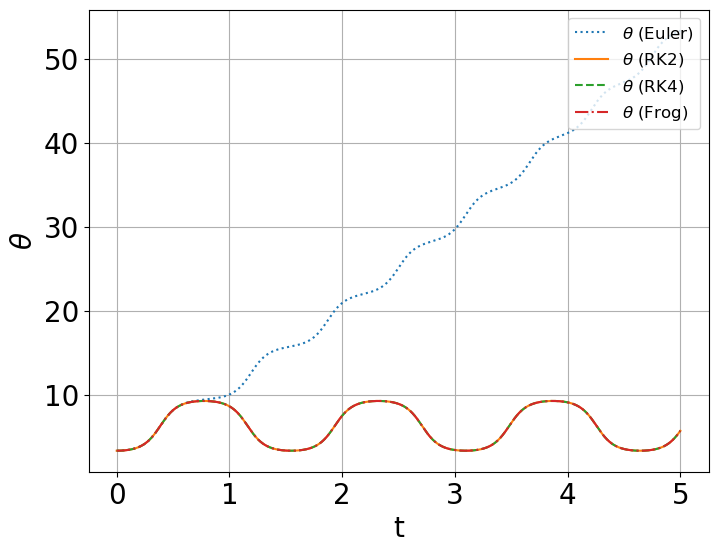

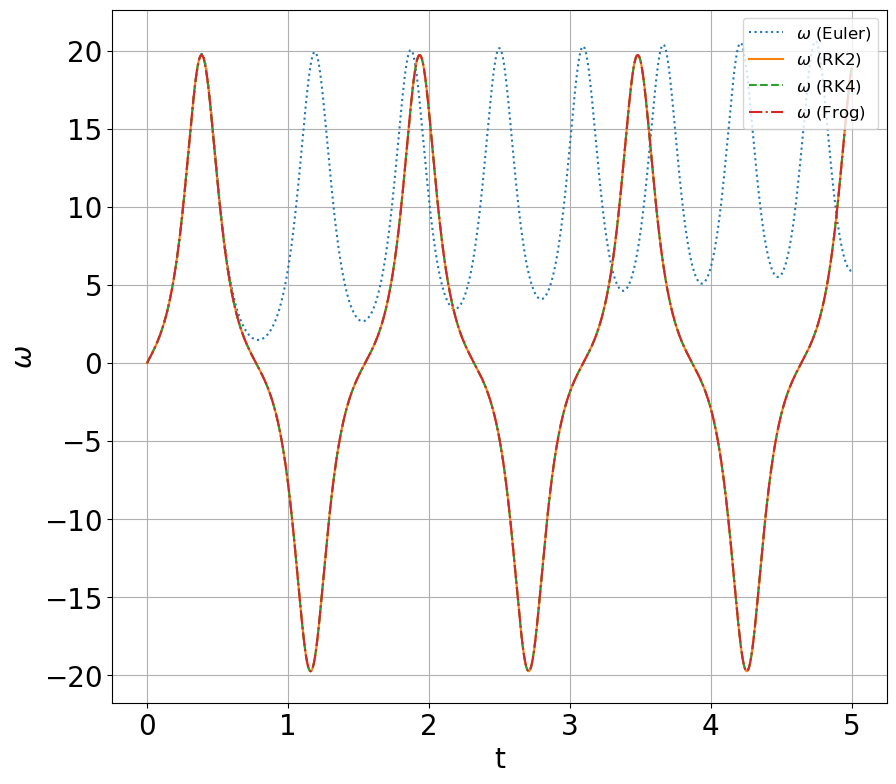

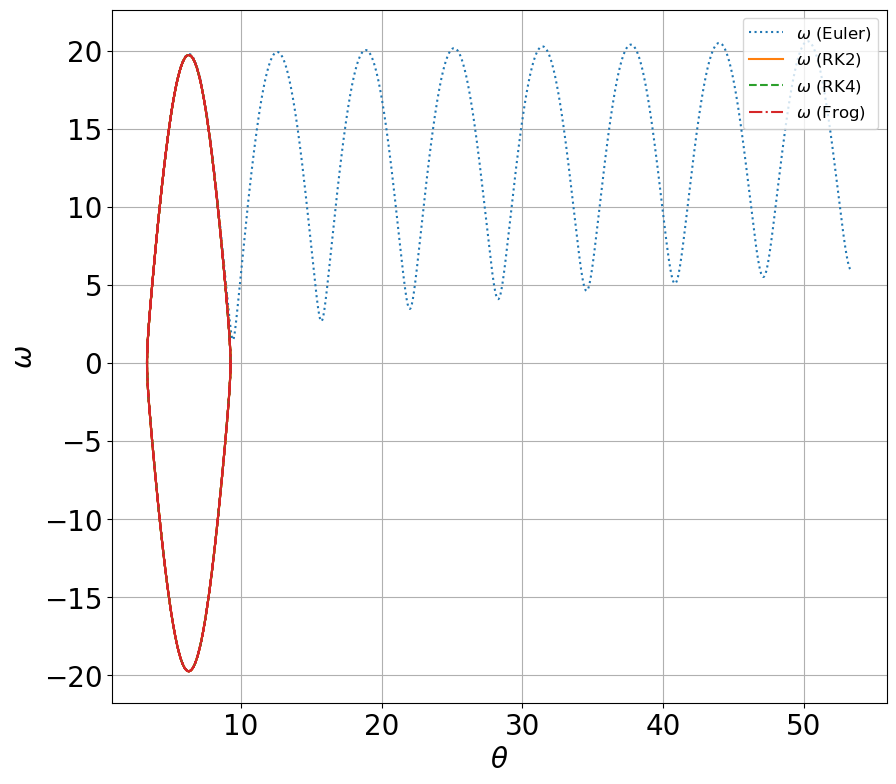

In [107]:
plt.figure(figsize=(8,6))
plt.plot(eul_pend_t, eul_pend_theta, ":" , label=r"$\theta$ (Euler)")
plt.plot(rk2_pend_t, rk2_pend_theta, "-" , label=r"$\theta$ (RK2)")
plt.plot(rk4_pend_t, rk4_pend_theta, "--" , label=r"$\theta$ (RK4)")
plt.plot(frg_pend_t, frg_pend_theta, "-." , label=r"$\theta$ (Frog)")
plt.xlabel("t" , fontsize=20)
plt.ylabel(r"$\theta$" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()


plt.figure(figsize=(10,9))
plt.plot(eul_pend_t,eul_pend_omega,  ":" , label=r"$\omega$ (Euler)")
plt.plot(rk2_pend_t,rk2_pend_omega,  "-" , label=r"$\omega$ (RK2)")
plt.plot(rk4_pend_t,rk4_pend_omega, "--" , label=r"$\omega$ (RK4)")
plt.plot(frg_pend_t,frg_pend_omega, "-." , label=r"$\omega$ (Frog)")
plt.xlabel("t" , fontsize=20)
plt.ylabel("$\omega$" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()


plt.figure(figsize=(10,9))
plt.plot(eul_pend_theta, eul_pend_omega, ":" , label=r"$\omega$ (Euler)")
plt.plot(rk2_pend_theta, rk2_pend_omega, "-" , label=r"$\omega$ (RK2)")
plt.plot(rk4_pend_theta, rk4_pend_omega, "--", label=r"$\omega$ (RK4)")
plt.plot(frg_pend_theta, frg_pend_omega, "-.", label=r"$\omega$ (Frog)")
plt.xlabel(r"$\theta$" , fontsize=20)
plt.ylabel("$\omega$" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()

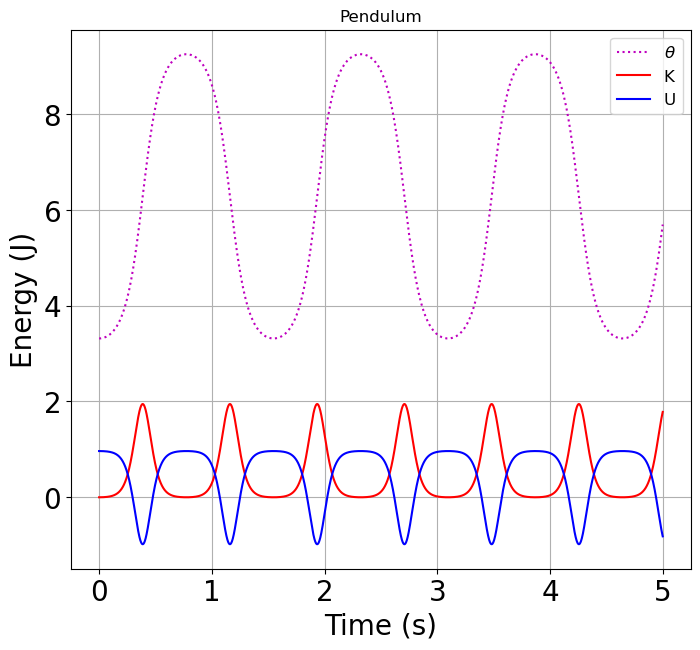

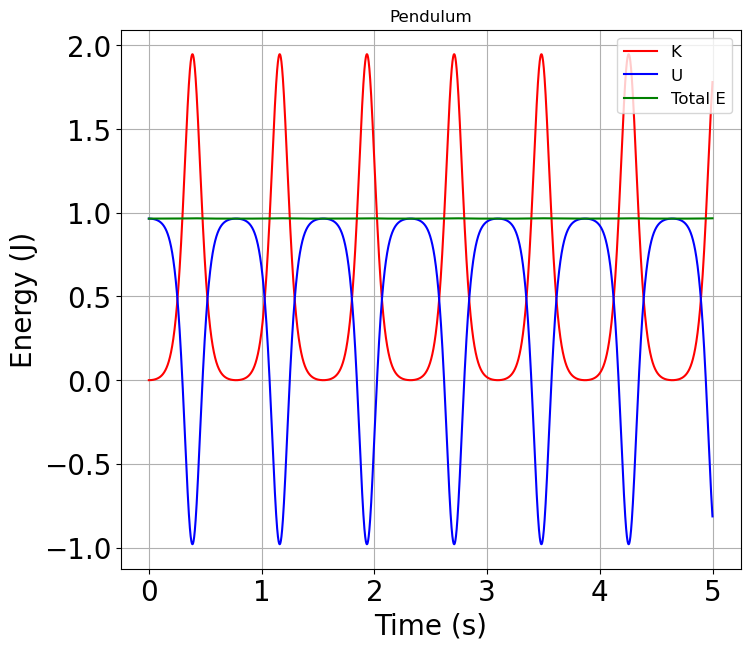

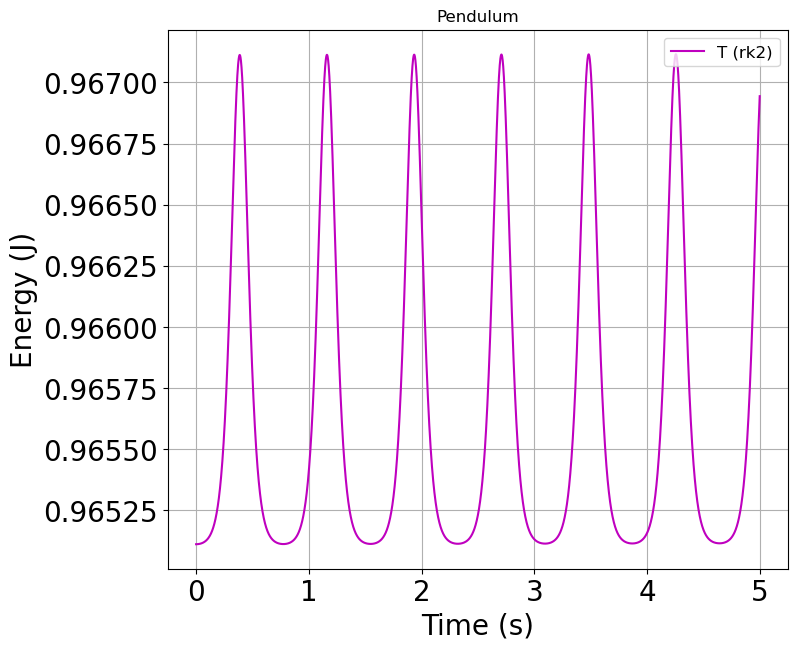

In [161]:
### Calculate Energies

# Convert theta & omega lists to numpy arrays for each method
a_eul_theta  = np.array(eul_pend_theta  , float)
a_eul_omega  = np.array(eul_pend_omega  , float)
a_rk2_theta  = np.array(rk2_pend_theta  , float)
a_rk2_omega  = np.array(rk2_pend_omega  , float)
a_rk4_theta  = np.array(rk4_pend_theta  , float)
a_rk4_omega  = np.array(rk4_pend_omega  , float)
a_frg_theta  = np.array(frg_pend_theta  , float)
a_frg_omega  = np.array(frg_pend_omega  , float)

# Kinetic energy
a_eul_K = 0.5 * m * l * l * a_eul_omega * a_eul_omega  # K = 1/2 I omeaga^2, I = mr^2. K = 1/2 m v^2, v = r*omega.
a_rk2_K = 0.5 * m * l * l * a_rk2_omega * a_rk2_omega  # K = 1/2 I omeaga^2, I = mr^2. K = 1/2 m v^2, v = r*omega.
a_rk4_K = 0.5 * m * l * l * a_rk4_omega * a_rk4_omega  # K = 1/2 I omeaga^2, I = mr^2. K = 1/2 m v^2, v = r*omega.
a_frg_K = 0.5 * m * l * l * a_frg_omega * a_frg_omega  # K = 1/2 I omeaga^2, I = mr^2. K = 1/2 m v^2, v = r*omega.

# height
a_eul_y = -l * np.cos(a_eul_theta) # pivot point is y = 0. lowest point is y = -l.
a_rk2_y = -l * np.cos(a_rk2_theta) # pivot point is y = 0. lowest point is y = -l.
a_rk4_y = -l * np.cos(a_rk4_theta) # pivot point is y = 0. lowest point is y = -l.
a_frg_y = -l * np.cos(a_frg_theta) # pivot point is y = 0. lowest point is y = -l.

# Potential energy
a_eul_U = m * 9.8 * a_eul_y
a_rk2_U = m * 9.8 * a_rk2_y
a_rk4_U = m * 9.8 * a_rk4_y
a_frg_U = m * 9.8 * a_frg_y

# Total energy
a_eul_T = a_eul_K + a_eul_U
a_rk2_T = a_rk2_K + a_rk2_U
a_rk4_T = a_rk4_K + a_rk4_U
a_frg_T = a_frg_K + a_frg_U

### Plot

plt.figure(figsize=(8,7))
plt.plot(rk4_pend_t, a_rk4_theta, "m:" , label=r'$\theta$') # label=r'text' -> raw string for latex use
plt.plot(rk4_pend_t, a_rk4_K    , "r"  , label=r'K') # label=r'text' -> raw string for latex use
plt.plot(rk4_pend_t, a_rk4_U    , "b"  , label=r'U') # label=r'text' -> raw string for latex use
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title('Pendulum')
plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Energy (J)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.show()


plt.figure(figsize=(8,7))
plt.plot(rk2_pend_t, a_rk2_K, "r" , label=r'K') # label=r'text' -> raw string for latex use
plt.plot(rk2_pend_t, a_rk2_U, "b" , label=r'U') # label=r'text' -> raw string for latex use
plt.plot(rk2_pend_t, a_rk2_T, "g" , label=r'Total E') # label=r'text' -> raw string for latex use
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title('Pendulum')
plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Energy (J)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
#plt.savefig('figs/NoDrag_EvsT.png', dpi=100)
plt.show()


plt.figure(figsize=(8,7))
#plt.plot(rk4_pend_t, a_frg_T, color = 'yellowgreen',  label=r'T (frog)') # label=r'text' -> raw string for latex use

#plt.plot(rk4_pend_t, a_eul_T, 'r',  label=r'T (euler)') # label=r'text' -> raw string for latex use

plt.plot(rk4_pend_t, a_rk2_T, 'm',  label=r'T (rk2)') # label=r'text' -> raw string for latex use

plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title('Pendulum')
plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Energy (J)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.show()

### Projectile trajectory with air resistance

In [ ]:
# Estimate the trajectory of a ball subjected to F_grav and F_drag
#  using the 4th order Runge-Kutta (RK) method

import numpy as np
import matplotlib.pyplot as plt


# Default constant definitions and initial conditions
#  constants
g   = 9.81       # acceleration due to gravity [m/s^2]
m   = 1.0        # mass = 1 kg
rho = 1.22       # air density [kg/m^3]
D   = 0.47       # Drag coefficient
R   = 0.08       # Radius of sphere [m]

#  initial conditions
h     = 0 # intitial height above the ground
theta = 75   # launch angle [degrees converted to radians]
v0    = 100  # initial velocity [m/s]

#  Set the time step for estimating the differential equation solution
delta_t = 0.1   # [s]


def f(r,const,g):
    x  = r[0]
    y  = r[1]
    vx = r[2]
    vy = r[3]
    fx = vx
    fy = vy
    fvx = -const*vx*np.sqrt(vx*vx+vy*vy)
    fvy = -const*vy*np.sqrt(vx*vx+vy*vy) - g
    #print("fx  = ",fx)
    #print("fy  = ",fy)
    #print("fvx = ",fvx)
    #print("fvy = ",fvy)
    return np.array( [fx,fy,fvx,fvy], float )


def trajectory(h, theta, v0, g, m, rho, D, R, delta_t):

    print("Find trajectory","h",h,", theta",theta,", v0",v0, ", g",g,", m", m,", rho", rho,", D",D,", R", R,", delta_t", delta_t)
    # Define constant
    c = (rho*D*np.pi*R*R)/(2*m)

    # Convert launch angle to radians
    theta*=   np.pi / 180

    # Initiate array containting position and velocity [x,y,vx,vy]
    #   x_i = 0  (initial x position)
    #   y_i = 0  (initial x position)
    #   vx_i = |v_i|cos(theta)  (x-component of initial velocity vector)
    #   vy_i = |v_i|sin(theta)  (y-component of initial velocity vector)
    r = np.array([ 0.0, h, v0*np.cos(theta), v0*np.sin(theta)] )

    # Store the x and y position for each time step
    l_x  = []
    l_y  = []
    l_vx = []
    l_vy = []
    l_t  = []

    # Time loop
    time=0
    while r[1] >= 0.0:  # stay in loop as long as you are above height = 0 (above the ground)
        #print("height = ",r[1] )
        l_x.append(r[0])
        l_y.append(r[1])
        l_vx.append(r[2])
        l_vy.append(r[3])
        l_t.append(time)
        time += delta_t

        # perform 4th order Runge-Kutta method
        k1 = delta_t * f(r,c,g)
        k2 = delta_t * f(r+0.5*k1,c,g)
        k3 = delta_t * f(r+0.5*k2,c,g)
        k4 = delta_t * f(r+k3,c,g)
        r += (k1+2*k2+2*k3+k4)/6


    return l_x, l_y, l_vx, l_vy, l_t

In [ ]:
temp_theta = 75
temp_delta_t = 0.25

# def trajectory(h, theta, v0, g, m, rho, D, R, delta_t):
#b0_x, b0_y, b0_vx, b0_vy, b0_t = trajectory(h, temp_theta, v0, g, m, rho, 3, 0.01, temp_delta_t)


# ------------------------------------------------------
# Trajectory with no air resistance

b0_x, b0_y, b0_vx, b0_vy, b0_t = trajectory(h, temp_theta, v0, g, m, rho, 0, 0.01, temp_delta_t)
c0_x, c0_y, c0_vx, c0_vy, c0_t = trajectory(h, temp_theta, v0, g, 4, rho, 0, 0.01, temp_delta_t)

# ------------------------------------------------------
# Trajectory with air resistance for different ball sizes
b1_x, b1_y, b1_vx, b1_vy, b1_t = trajectory(h, temp_theta, v0, g, m, rho, D, 0.01, temp_delta_t)
b2_x, b2_y, b2_vx, b2_vy, b2_t = trajectory(h, temp_theta, v0, g, m, rho, D, 0.02, temp_delta_t)
b3_x, b3_y, b3_vx, b3_vy, b3_t = trajectory(h, temp_theta, v0, g, m, rho, D, 0.03, temp_delta_t)
b4_x, b4_y, b4_vx, b4_vy, b4_t = trajectory(h, temp_theta, v0, g, m, rho, D, 0.04, temp_delta_t)
b5_x, b5_y, b5_vx, b5_vy, b5_t = trajectory(h, temp_theta, v0, g, m, rho, D, 0.05, temp_delta_t)
b6_x, b6_y, b6_vx, b6_vy, b6_t = trajectory(h, temp_theta, v0, g, m, rho, D, 0.06, temp_delta_t)


# ------------------------------------------------------
# Trajectory with air resistance for different masses
c1_x, c1_y, c1_vx, c1_vy, c1_t = trajectory(h, temp_theta, v0, g, m, rho, D, 0.04, temp_delta_t)
c2_x, c2_y, c2_vx, c2_vy, c2_t = trajectory(h, temp_theta, v0, g, 2*m, rho, D, 0.04, temp_delta_t)
c3_x, c3_y, c3_vx, c3_vy, c3_t = trajectory(h, temp_theta, v0, g, 3*m, rho, D, 0.04, temp_delta_t)
c4_x, c4_y, c4_vx, c4_vy, c4_t = trajectory(h, temp_theta, v0, g, 4*m, rho, D, 0.04, temp_delta_t)




# ------------------------------------------------------
# Trajectory with air resistance for different launch angles
d1_x, d1_y, d1_vx, d1_vy, d1_t = trajectory(h, 10, v0, g, m, rho, D, 0.04, temp_delta_t)
d2_x, d2_y, d2_vx, d2_vy, d2_t = trajectory(h, 20, v0, g, m, rho, D, 0.04, temp_delta_t)
d3_x, d3_y, d3_vx, d3_vy, d3_t = trajectory(h, 30, v0, g, m, rho, D, 0.04, temp_delta_t)
d4_x, d4_y, d4_vx, d4_vy, d4_t = trajectory(h, 40, v0, g, m, rho, D, 0.04, temp_delta_t)
d5_x, d5_y, d5_vx, d5_vy, d5_t = trajectory(h, 50, v0, g, m, rho, D, 0.04, temp_delta_t)
d6_x, d6_y, d6_vx, d6_vy, d6_t = trajectory(h, 60, v0, g, m, rho, D, 0.04, temp_delta_t)
d7_x, d7_y, d7_vx, d7_vy, d7_t = trajectory(h, 70, v0, g, m, rho, D, 0.04, temp_delta_t)
d8_x, d8_y, d8_vx, d8_vy, d8_t = trajectory(h, 80, v0, g, m, rho, D, 0.04, temp_delta_t)
d9_x, d9_y, d9_vx, d9_vy, d9_t = trajectory(h, 90, v0, g, m, rho, D, 0.04, temp_delta_t)


# ------------------------------------------------------
# Trajectory without air resistance for different launch angles
e1_x, e1_y, e1_vx, e1_vy, e1_t = trajectory(h, 10, v0, g, m, rho, 0, 0.04, temp_delta_t)
e2_x, e2_y, e2_vx, e2_vy, e2_t = trajectory(h, 20, v0, g, m, rho, 0, 0.04, temp_delta_t)
e3_x, e3_y, e3_vx, e3_vy, e3_t = trajectory(h, 30, v0, g, m, rho, 0, 0.04, temp_delta_t)
e4_x, e4_y, e4_vx, e4_vy, e4_t = trajectory(h, 40, v0, g, m, rho, 0, 0.04, temp_delta_t)
e5_x, e5_y, e5_vx, e5_vy, e5_t = trajectory(h, 50, v0, g, m, rho, 0, 0.04, temp_delta_t)
e6_x, e6_y, e6_vx, e6_vy, e6_t = trajectory(h, 60, v0, g, m, rho, 0, 0.04, temp_delta_t)
e7_x, e7_y, e7_vx, e7_vy, e7_t = trajectory(h, 70, v0, g, m, rho, 0, 0.04, temp_delta_t)
e8_x, e8_y, e8_vx, e8_vy, e8_t = trajectory(h, 80, v0, g, m, rho, 0, 0.04, temp_delta_t)
e9_x, e9_y, e9_vx, e9_vy, e9_t = trajectory(h, 90, v0, g, m, rho, 0, 0.04, temp_delta_t)



# ------------------------------------------------------
# Trajectory with air resistance for different launch angles (smaller variation)
f1_x, f1_y, f1_vx, f1_vy, f1_t = trajectory(h, 38, v0, g, m, rho, D, 0.04, 0.1)
f2_x, f2_y, f2_vx, f2_vy, f2_t = trajectory(h, 39, v0, g, m, rho, D, 0.04, 0.1)
f3_x, f3_y, f3_vx, f3_vy, f3_t = trajectory(h, 40, v0, g, m, rho, D, 0.04, 0.1)
f4_x, f4_y, f4_vx, f4_vy, f4_t = trajectory(h, 41, v0, g, m, rho, D, 0.04, 0.1)
f5_x, f5_y, f5_vx, f5_vy, f5_t = trajectory(h, 42, v0, g, m, rho, D, 0.04, 0.1)
f6_x, f6_y, f6_vx, f6_vy, f6_t = trajectory(h, 43, v0, g, m, rho, D, 0.04, 0.1)
f7_x, f7_y, f7_vx, f7_vy, f7_t = trajectory(h, 44, v0, g, m, rho, D, 0.04, 0.1)
f8_x, f8_y, f8_vx, f8_vy, f8_t = trajectory(h, 45, v0, g, m, rho, D, 0.04, 0.1)
f9_x, f9_y, f9_vx, f9_vy, f9_t = trajectory(h, 46, v0, g, m, rho, D, 0.04, 0.1)



# ------------------------------------------------------
# Trajectory without air resistance for different launch angles

g0_x, g0_y, g0_vx, g0_vy, g0_t = trajectory(700,   0, v0, g, m, rho, 0, 0.04, temp_delta_t)

g3_x, g3_y, g3_vx, g3_vy, g3_t = trajectory(700, -30, v0, g, m, rho, 0, 0.04, temp_delta_t)
g4_x, g4_y, g4_vx, g4_vy, g4_t = trajectory(700,  30, v0, g, m, rho, 0, 0.04, temp_delta_t)
g5_x, g5_y, g5_vx, g5_vy, g5_t = trajectory(700, -60, v0, g, m, rho, 0, 0.04, temp_delta_t)
g6_x, g6_y, g6_vx, g6_vy, g6_t = trajectory(700,  60, v0, g, m, rho, 0, 0.04, temp_delta_t)
g7_x, g7_y, g7_vx, g7_vy, g7_t = trajectory(700, -90, v0, g, m, rho, 0, 0.04, temp_delta_t)
g8_x, g8_y, g8_vx, g8_vy, g8_t = trajectory(700,  90, v0, g, m, rho, 0, 0.04, temp_delta_t)



# ------------------------------------------------------
# Falling object (no initial velocity)

#                                trajectory(h, theta, v0, g, m, rho, D, R, delta_t):
h0_x, h0_y, h0_vx, h0_vy, h0_t = trajectory(1000, 0, 0, g, 100, rho, 0, 0.04, temp_delta_t)
h1_x, h1_y, h1_vx, h1_vy, h1_t = trajectory(1000, 0, 0, g, 100, rho, D, 0.5, temp_delta_t)
h2_x, h2_y, h2_vx, h2_vy, h2_t = trajectory(1000, 0, 0, g, 100, rho, D, 10, temp_delta_t)


In [ ]:
# Plot no drag trajectory
plt.figure(figsize=(8,7))

convert_mps_to_mph = 2.23694
convert_m_to_ft    = 3.28084

ah0_vy  = np.array(h0_vy  , float)
ah1_vy  = np.array(h1_vy  , float)
ah2_vy  = np.array(h2_vy  , float)
ah0_y  = np.array(h0_y  , float)
ah1_y  = np.array(h1_y  , float)
ah2_y  = np.array(h2_y  , float)

speed_0 = np.abs(ah0_vy) * convert_mps_to_mph
speed_1 = np.abs(ah1_vy) * convert_mps_to_mph
speed_2 = np.abs(ah2_vy) * convert_mps_to_mph

height_0 = ah0_y * convert_m_to_ft
height_1 = ah1_y * convert_m_to_ft
height_2 = ah2_y * convert_m_to_ft

print(speed_1)

plt.plot( speed_0, height_0, "o" , label='No Drag')
plt.plot( speed_1, height_1, "o" , label='Skydiver with drag - no parachute')   # label=r'text' -> raw string for latex use
plt.plot( speed_2, height_2, "o" , label='Skydiver with drag - parachute')   # label=r'text' -> raw string for latex use
plt.ylim(0.0)
#plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title('Falling object terminal velocity')
plt.xlabel("Speed (mph)" , fontsize=20)
plt.ylabel("Height (ft)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.savefig('TerminalVelocity_VYvsY.png', dpi=100)
plt.show()

In [ ]:
# Plot no drag trajectory
plt.figure(figsize=(8,7))
plt.plot(b0_x, b0_y, "o" , label='No Drag')   # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile ($\theta='+str(temp_theta)+'$)')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.savefig('NoDrag_YvsX.png', dpi=100)
plt.show()

In [ ]:
plt.figure(figsize=(8,7))
plt.plot(b4_x, b4_y, "o" , label='Ball with drag')   # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile ($\theta='+str(temp_theta)+'$)')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
#plt.savefig('figs/Drag_YvsX.png', dpi=100)
plt.show()

In [ ]:
plt.figure(figsize=(8,7))
plt.plot(b0_x, b0_y, "o" , label='No Drag')   # label=r'text' -> raw string for latex use
plt.plot(b4_x, b4_y, "o" , label='With Drag') # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile ($\theta='+str(temp_theta)+'$)')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
#plt.savefig('figs/CompareDragNoDrag_YvsX.png', dpi=100)
plt.show()

In [ ]:
plt.figure(figsize=(8,7))
plt.plot(b0_x, b0_y, "o" , label='No Drag')   # label=r'text' -> raw string for latex use
plt.plot(b1_x, b1_y, "o" , label='Drag (R=1cm)')   # label=r'text' -> raw string for latex use
plt.plot(b2_x, b2_y, "o" , label='Drag (R=2cm)') # label=r'text' -> raw string for latex use
plt.plot(b3_x, b3_y, "o" , label='Drag (R=3cm)') # label=r'text' -> raw string for latex use
plt.plot(b4_x, b4_y, "o" , label='Drag (R=4cm)') # label=r'text' -> raw string for latex use
plt.plot(b5_x, b5_y, "o" , label='Drag (R=5cm)') # label=r'text' -> raw string for latex use
plt.plot(b6_x, b6_y, "o" , label='Drag (R=6cm)') # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile ($\theta='+str(temp_theta)+'$)')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=10)
#plt.savefig('figs/CompareDragNoDrag_VaryBallSize_YvsX.png', dpi=100)
plt.show()

In [ ]:
plt.figure(figsize=(8,7))
plt.plot(b0_x, b0_y, "o" , label='No Drag')   # label=r'text' -> raw string for latex use
plt.plot(c1_x, c1_y, "o" , label='Drag (m=1kg)')   # label=r'text' -> raw string for latex use
plt.plot(c2_x, c2_y, "o" , label='Drag (m=2kg)') # label=r'text' -> raw string for latex use
plt.plot(c3_x, c3_y, "o" , label='Drag (m=3kg)') # label=r'text' -> raw string for latex use
plt.plot(c4_x, c4_y, "o" , label='Drag (m=4kg)') # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile ($\theta='+str(temp_theta)+'$)')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=10)
#plt.savefig('figs/CompareDragNoDrag_VaryMass_YvsX.png', dpi=100)
plt.show()

In [ ]:
# Plot no drag trajectory
plt.figure(figsize=(8,7))
plt.plot(b0_x, b0_y, "o" , label='No Drag (m=1kg)')   # label=r'text' -> raw string for latex use
plt.plot(c0_x, c0_y, "s" , markersize=3, label='No Drag (m=4kg)')   # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile ($\theta='+str(temp_theta)+'$)')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
#plt.savefig('figs/NoDrag_VaryMass_YvsX.png', dpi=100)
plt.show()

In [ ]:
plt.figure(figsize=(8,7))
#plt.plot(b0_x, b0_y, "o" , label='No Drag')   # label=r'text' -> raw string for latex use
plt.plot(d1_x, d1_y, "o" , label=r'$\theta = 10$')   # label=r'text' -> raw string for latex use
plt.plot(d2_x, d2_y, "o" , label=r'$\theta = 20$') # label=r'text' -> raw string for latex use
plt.plot(d3_x, d3_y, "o" , label=r'$\theta = 30$') # label=r'text' -> raw string for latex use
plt.plot(d4_x, d4_y, "o" , label=r'$\theta = 40$') # label=r'text' -> raw string for latex use
plt.plot(d5_x, d5_y, "o" , label=r'$\theta = 50$') # label=r'text' -> raw string for latex use
plt.plot(d6_x, d6_y, "o" , label=r'$\theta = 60$') # label=r'text' -> raw string for latex use
plt.plot(d7_x, d7_y, "o" , label=r'$\theta = 70$') # label=r'text' -> raw string for latex use
plt.plot(d8_x, d8_y, "o" , label=r'$\theta = 80$') # label=r'text' -> raw string for latex use
plt.plot(d9_x, d9_y, "o" , label=r'$\theta = 90$') # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=10)
#plt.savefig('figs/Drag_VaryLaunchAngle_YvsX.png', dpi=100)
plt.show()

In [ ]:
plt.figure(figsize=(8,7))
#plt.plot(b0_x, b0_y, "o" , label='No Drag')   # label=r'text' -> raw string for latex use
plt.plot(e1_x, e1_y, "o" , label=r'$\theta = 10$')   # label=r'text' -> raw string for latex use
plt.plot(e2_x, e2_y, "o" , label=r'$\theta = 20$') # label=r'text' -> raw string for latex use
plt.plot(e3_x, e3_y, "o" , label=r'$\theta = 30$') # label=r'text' -> raw string for latex use
plt.plot(e4_x, e4_y, "o" , label=r'$\theta = 40$') # label=r'text' -> raw string for latex use
plt.plot(e5_x, e5_y, "o" , label=r'$\theta = 50$') # label=r'text' -> raw string for latex use
plt.plot(e6_x, e6_y, "o" , label=r'$\theta = 60$') # label=r'text' -> raw string for latex use
plt.plot(e7_x, e7_y, "o" , label=r'$\theta = 70$') # label=r'text' -> raw string for latex use
plt.plot(e8_x, e8_y, "o" , label=r'$\theta = 80$') # label=r'text' -> raw string for latex use
plt.plot(e9_x, e9_y, "o" , label=r'$\theta = 90$') # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=10)
#plt.savefig('figs/NoDrag_VaryLaunchAngle_YvsX.png', dpi=100)
plt.show()

In [ ]:
plt.figure(figsize=(10,9))
#plt.plot(b0_x, b0_y, "o" , label='No Drag')   # label=r'text' -> raw string for latex use
#plt.plot(f1_x, f1_y,  "-",  label=r'$\theta = 38$')   # label=r'text' -> raw string for latex use
plt.plot(f2_x, f2_y,   "-", label=r'$\theta = 39$') # label=r'text' -> raw string for latex use
#plt.plot(f3_x, f3_y,  "-",  label=r'$\theta = 40$') # label=r'text' -> raw string for latex use
plt.plot(f4_x, f4_y,   ":", label=r'$\theta = 41$') # label=r'text' -> raw string for latex use
#plt.plot(f5_x, f5_y,  "-",  label=r'$\theta = 42$') # label=r'text' -> raw string for latex use
plt.plot(f6_x, f6_y,   "--", label=r'$\theta = 43$') # label=r'text' -> raw string for latex use
#plt.plot(f7_x, f7_y,  "-",  label=r'$\theta = 44$') # label=r'text' -> raw string for latex use
plt.plot(f8_x, f8_y,   "-.", label=r'$\theta = 45$') # label=r'text' -> raw string for latex use
#plt.plot(f9_x, f9_y,  "-",  label=r'$\theta = 46$') # label=r'text' -> raw string for latex use
plt.ylim(0.0)
#plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=10)
#plt.savefig('figs/Drag_VaryLaunchAngle_YvsX.png', dpi=100)
plt.show()

In [ ]:
plt.figure(figsize=(8,7))
#plt.plot(b0_x, b0_y, "o" , label='No Drag')   # label=r'text' -> raw string for latex use
#plt.plot(g1_x, g1_y, "o" , label=r'$\theta = 10$')   # label=r'text' -> raw string for latex use
#plt.plot(g2_x, g2_y, "o" , label=r'$\theta = 20$') # label=r'text' -> raw string for latex use
#plt.plot(g3_x, g3_y, "o" , label=r'$\theta = 30$') # label=r'text' -> raw string for latex use
plt.plot(g0_x, g0_y, "o" , label=r'$\theta =   0$') # label=r'text' -> raw string for latex use
plt.plot(g3_x, g3_y, "o" , label=r'$\theta = -30$') # label=r'text' -> raw string for latex use
plt.plot(g4_x, g4_y, "o" , label=r'$\theta = 30$') # label=r'text' -> raw string for latex use
plt.plot(g5_x, g5_y, "o" , label=r'$\theta = -60$') # label=r'text' -> raw string for latex use
plt.plot(g6_x, g6_y, "o" , label=r'$\theta = 60$') # label=r'text' -> raw string for latex use
plt.ylim(0.0)
plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title(r'Spherical projectile')
plt.xlabel("x (m)" , fontsize=20)
plt.ylabel("y (m)" , fontsize=20)
plt.legend(loc='upper right', fontsize=10)
#plt.savefig('figs/NoDrag_VaryLaunchAngle_YvsX.png', dpi=100)
plt.show()

In [ ]:
### Calculate Energies
a0_x  = np.array(b0_x  , float)
a0_y  = np.array(b0_y  , float)
a0_vx = np.array(b0_vx , float)
a0_vy = np.array(b0_vy , float)
a0_t  = np.array(b0_t  , float)

a0_v_squared = a0_vx*a0_vx+a0_vy*a0_vy
a0_K         =  0.5 * m * a0_v_squared
a0_U         =  9.8 * m * a0_y
a0_T         = a0_K + a0_U

plt.figure(figsize=(8,7))
plt.plot(a0_t, a0_K, "r" , label=r'K') # label=r'text' -> raw string for latex use
plt.plot(a0_t, a0_U, "b" , label=r'U') # label=r'text' -> raw string for latex use
plt.plot(a0_t, a0_T, "g" , label=r'E total') # label=r'text' -> raw string for latex use
#plt.ylim(0.0)
#plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title('Spherical projectile (no drag)')
plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Energy (J)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
#plt.savefig('figs/NoDrag_EvsT.png', dpi=100)
plt.show()


In [ ]:
### Calculate Energies
a4_x  = np.array(b4_x  , float)
a4_y  = np.array(b4_y  , float)
a4_vx = np.array(b4_vx , float)
a4_vy = np.array(b4_vy , float)
a4_t  = np.array(b4_t  , float)

a4_v_squared = a4_vx*a4_vx+a4_vy*a4_vy
a4_K         =  0.5 * m * a4_v_squared
a4_U         =  9.8 * m * a4_y
a4_T         = a4_K + a4_U

plt.figure(figsize=(8,7))
plt.plot(a4_t, a4_K, "r" , label=r'K') # label=r'text' -> raw string for latex use
plt.plot(a4_t, a4_U, "b" , label=r'U') # label=r'text' -> raw string for latex use
plt.plot(a4_t, a4_T, "g" , label=r'E total') # label=r'text' -> raw string for latex use
#plt.ylim(0.0)
#plt.axis('square')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.title('Spherical projectile (with drag)')
plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Energy (J)" , fontsize=20)
plt.legend(loc='upper right', fontsize=12)
#plt.savefig('figs/Drag_EvsT.png', dpi=100)
plt.show()


In [ ]:
#https://matplotlib.org/examples/animation/double_pendulum_animated.html

"""
===========================
The double pendulum problem
===========================

This animation illustrates the double pendulum problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

# ani.save('double_pendulum.mp4', fps=15)
plt.show()

#ani.save('the_movie.mp4', writer = 'mencoder', fps=15)

from IPython.display import HTML
HTML(ani.to_html5_video())